# Tracking the Trends: Popularity Patterns in Spotify Hip Hop/Rap Streaming


Hip hop stands as one of Spotify's most streamed and dominant genres, yet understanding listener engagement within this space remains a challenge. Despite access to vast user data, Spotify's recommendations and marketing efforts often struggle to capture the unique listening behaviors of hip hop audiences.

This is particularly crucial as streaming platforms for listener attention in an increasingly crowded market. In 2023, nearly a quarter of all streams on Spotify globally were hip hop music, underscoring the genre's dominant presence on the platform . Moreover, the global hip hop industry generated over $25 billion in revenue in 2020, reflecting its substantial economic impact.

My project aims to look into how Spotify users interact with hip hop and rap music, analyzing listening patterns to uncover distinct listener segments—such as casual fans or devoted followers. By leveraging engagement data, the goal is to provide actionable insights that can help Spotify personalize recommendations, refine marketing campaigns, and ultimately enhance listener retention in this vital and expanding genre.

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the cleaned dataset
df = pd.read_csv('cleaned_spotify_dataset.csv')
df.head()

,year,track_name,track_popularity,album,artist_name,artist_genres,artist_popularity,danceability,energy,key,...,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,genre_group,genre_category,duration_min
0,2000,Oops!...I Did It Again,81,Oops!... I Did It Again,Britney Spears,"['dance pop', 'pop']",81,0.751,0.834,1,...,0.3000,0.000018,0.3550,0.894,95.053,211160,4,dance pop,Pop,3.519333
1,2000,All The Small Things,83,Enema Of The State,blink-182,"['alternative metal', 'modern rock', 'pop punk...",79,0.434,0.897,0,...,0.0103,0.000000,0.6120,0.684,148.726,167067,4,alternative metal,Rock,2.784450
2,2000,Breathe,66,Breathe,Faith Hill,"['contemporary country', 'country', 'country d...",62,0.529,0.496,7,...,0.1730,0.000000,0.2510,0.278,136.859,250547,4,contemporary country,Country,4.175783
3,2000,It's My Life,81,Crush,Bon Jovi,"['glam metal', 'rock']",79,0.551,0.913,0,...,0.0263,0.000013,0.3470,0.544,119.992,224493,4,glam metal,Rock,3.741550
4,2000,Bye Bye Bye,75,No Strings Attached,*NSYNC,"['boy band', 'dance pop', 'pop']",70,0.610,0.926,8,...,0.0310,0.001200,0.0821,0.861,172.638,200400,4,boy band,Other,3.340000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400 entries, 0 to 2399
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   year               2400 non-null   int64  
 1   track_name         2400 non-null   object 
 2   track_popularity   2400 non-null   int64  
 3   album              2400 non-null   object 
 4   artist_name        2400 non-null   object 
 5   artist_genres      2400 non-null   object 
 6   artist_popularity  2400 non-null   int64  
 7   danceability       2400 non-null   float64
 8   energy             2400 non-null   float64
 9   key                2400 non-null   int64  
 10  loudness           2400 non-null   float64
 11  mode               2400 non-null   int64  
 12  speechiness        2400 non-null   float64
 13  acousticness       2400 non-null   float64
 14  instrumentalness   2400 non-null   float64
 15  liveness           2400 non-null   float64
 16  valence            2400 

In [5]:
df.isnull().sum()

year                  0
track_name            0
track_popularity      0
album                 0
artist_name           0
artist_genres         0
artist_popularity     0
danceability          0
energy                0
key                   0
loudness              0
mode                  0
speechiness           0
acousticness          0
instrumentalness      0
liveness              0
valence               0
tempo                 0
duration_ms           0
time_signature        0
genre_group          17
genre_category       17
duration_min          0
dtype: int64

In [6]:
# Average popularity by genre
df.groupby('genre_category')['track_popularity'].agg(['mean', 'count']).sort_values(by='mean', ascending=False)

,mean,count
genre_category,,
Latin,77.794118,34
Jazz / Blues,77.000000,1
Rock,73.384236,203
Folk,71.000000,3
Hip Hop / Rap,70.766234,462
Pop,70.130233,1075
Country,69.750000,36
Electronic,68.905882,85
Other,68.886243,378


In [7]:
df_filtered = df[df['track_popularity'].notna() & df['genre_category'].notna()]

hiphop_df = df_filtered[df_filtered['genre_category'] == 'Hip Hop / Rap']
other_df = df_filtered[df_filtered['genre_category'] != 'Hip Hop / Rap']

##### I started with a correlation heatmap to get a high-level view of how numerical features relate to one another and to the target variable, track_popularity. This helped me quickly spot relationships worth exploring deeper and identify potential multicollinearity between variables. After reviewing the heatmap, I decided to focus on key features that appeared most relevant to popularity, including release_year, track_popularity, artist_popularity, danceability, energy, duration_ms, speechiness, loudness, and tempo, as these showed noticeable correlations and are likely to influence listener engagement.

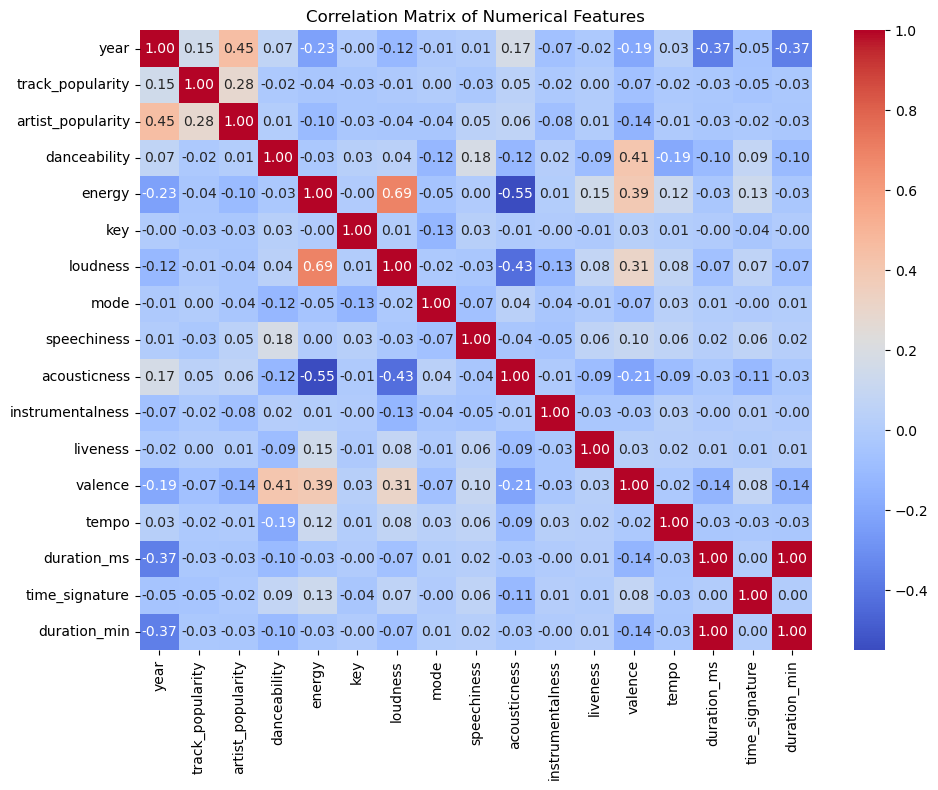

In [15]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numerical Features")
plt.tight_layout()
plt.show()

##### Here, I wanted to explore how the distribution of track_popularity varied across genres-specifically between Hip Hop/Rap and other genres. To further explore the relationship between genre and track popularity, I visualized the distribution using a filled KDE plot. This allowed me to clearly compare the density of popularity scores between Hip Hop / Rap tracks and those from other genres. The filled curves highlight where popularity tends to cluster for each group and whether one genre consistently performs better. This step helped me visually validate the statistical differences suggested in the earlier analysis.

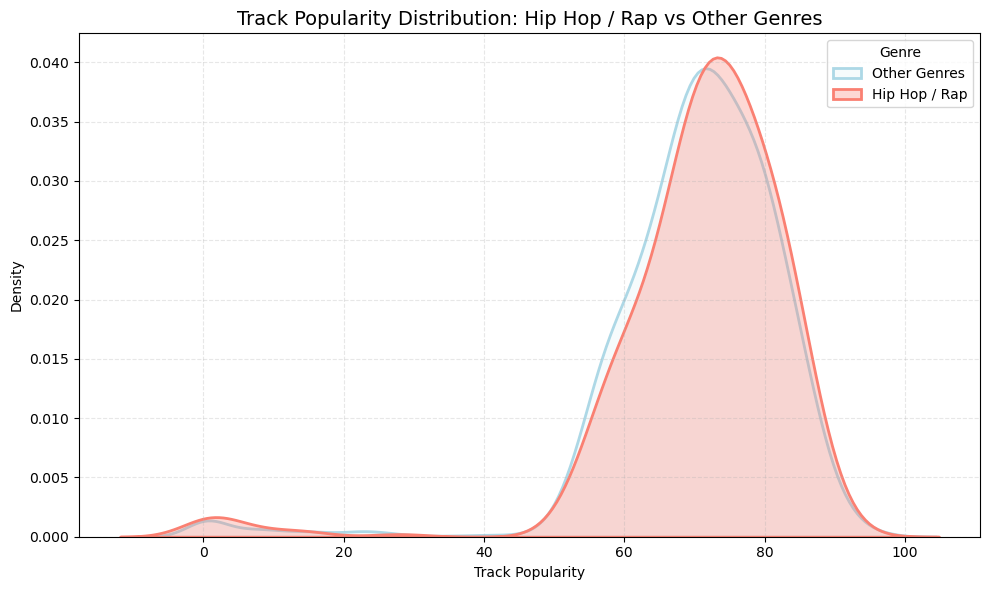

In [17]:
plt.figure(figsize=(10, 6))

# KDE for Other genres
sns.kdeplot(
    data=other_df,
    x='track_popularity',
    label='Other Genres',
    color='lightblue',
    fill=True,
    alpha=0.1,
    linewidth=2
)

# KDE for Hip Hop / Rap
sns.kdeplot(
    data=hiphop_df,
    x='track_popularity',
    label='Hip Hop / Rap',
    color='salmon',
    fill=True,
    alpha=0.3,
    linewidth=2
)

plt.title("Track Popularity Distribution: Hip Hop / Rap vs Other Genres", fontsize=14)
plt.xlabel("Track Popularity")
plt.ylabel("Density")
plt.legend(title="Genre")
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

##### Track duration can influence listening behavior, user engagement, and even how tracks perform in algorithmic reccomenations. This bar plot shows the mean track duration for each genre, highlighting Hip Hop / Rap to help isolate it's performance. 

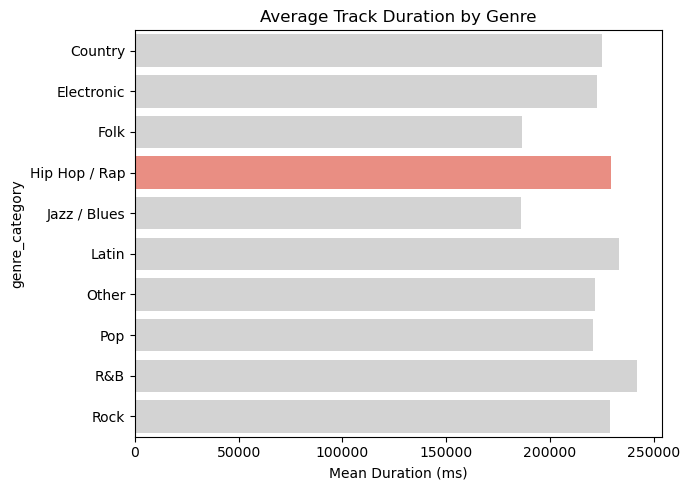

In [20]:
mean_duration = df.groupby('genre_category')['duration_ms'].mean().reset_index()

mean_duration['highlight'] = mean_duration['genre_category'].apply(
    lambda x: 'Hip Hop / Rap' if x == 'Hip Hop / Rap' else 'Other')

palette = {'Hip Hop / Rap': 'salmon', 'Other': 'lightgray'}

plt.figure(figsize=(7, 5))
sns.barplot(data=mean_duration, x='duration_ms', y='genre_category', hue='highlight', palette=palette, dodge=False, legend=False)
plt.title("Average Track Duration by Genre")
plt.xlabel("Mean Duration (ms)")
plt.tight_layout()
plt.show()

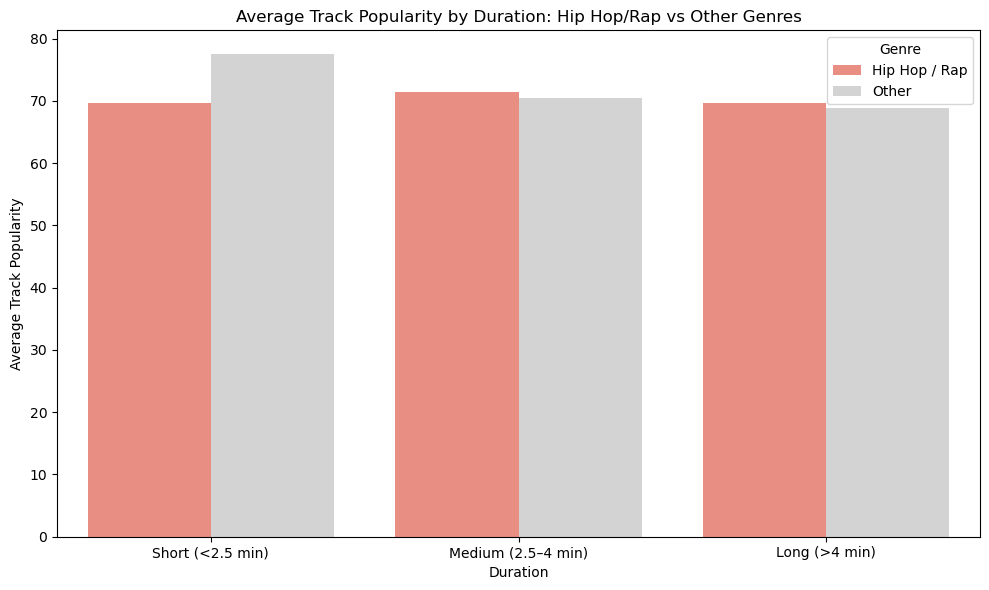

In [22]:
# Create duration bins
df['duration_bin'] = pd.cut(
    df['duration_ms'],
    bins=[0, 150000, 240000, 400000],  # adjust if needed
    labels=['Short (<2.5 min)', 'Medium (2.5–4 min)', 'Long (>4 min)']
)

#Create a binary genre type
df['genre_type'] = df['genre_category'].apply(lambda x: 'Hip Hop / Rap' if x == 'Hip Hop / Rap' else 'Other')

#Group by duration bin and genre type
avg_popularity = df.groupby(['duration_bin', 'genre_type'], observed=False)['track_popularity'].mean().reset_index()

#Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_popularity, x='duration_bin', y='track_popularity', hue='genre_type', palette={'Hip Hop / Rap': 'salmon', 'Other': 'lightgray'})

plt.title("Average Track Popularity by Duration: Hip Hop/Rap vs Other Genres")
plt.xlabel("Duration")
plt.ylabel("Average Track Popularity")
plt.legend(title="Genre")
plt.tight_layout()
plt.show()

##### I found that Hip Hop / Rap tracks tend to perform better in terms of popularity whe  their duration is 2.5 minutes or longer. This is important because it reveals behavioral trent in listeners engagement that inform both content creation and platform strategy. Additionally, this insight could help artists and producers optimize track length for maximum visibility and stream success. 

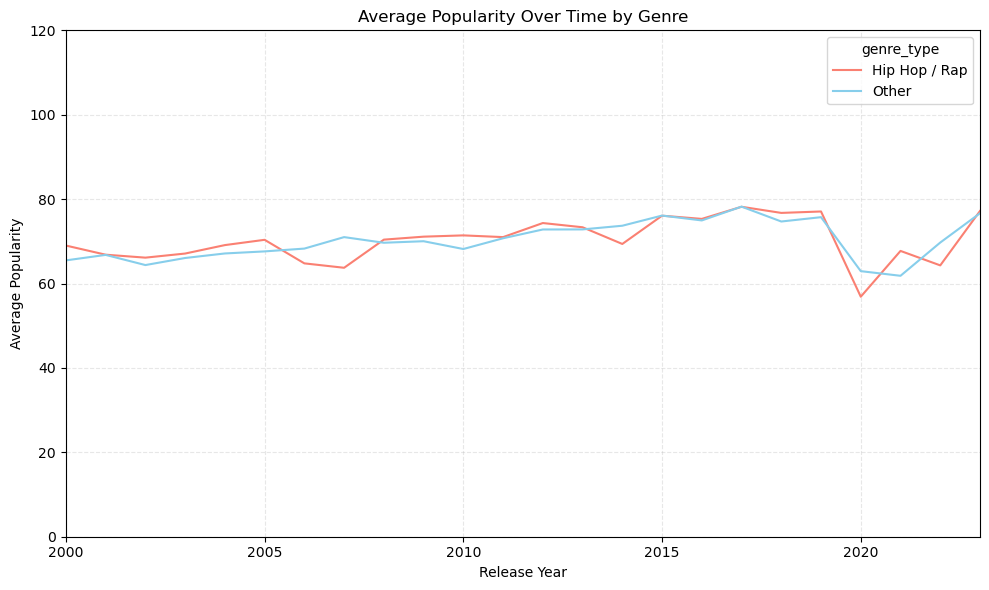

In [26]:
pop_by_year = df.groupby(['year', 'genre_type'])['track_popularity'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(
    data=pop_by_year,
    x='year',
    y='track_popularity',
    hue='genre_type',
    palette={'Hip Hop / Rap': 'salmon', 'Other': 'skyblue'}
)

plt.title("Average Popularity Over Time by Genre")
plt.xlabel("Release Year")
plt.ylabel("Average Popularity")
plt.grid(True, linestyle='--', alpha=0.3)

# Set axis limits
plt.xlim(2000, pop_by_year['year'].max())
plt.ylim(0, 120)

plt.tight_layout()
plt.show()

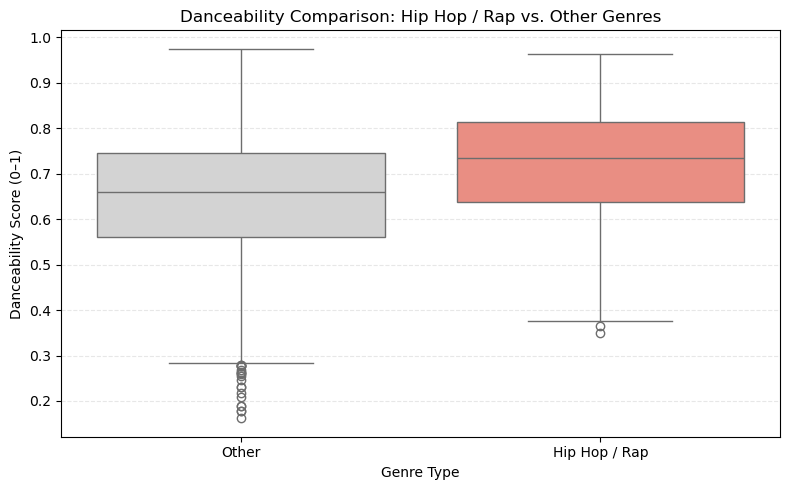

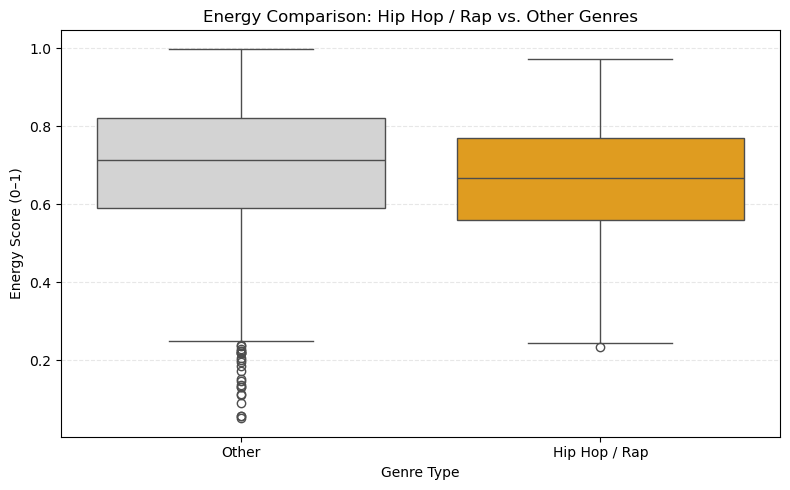

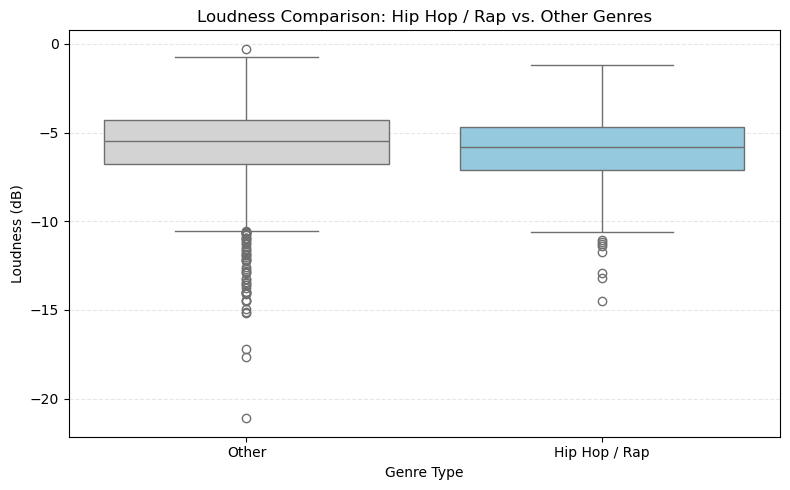

In [28]:
df['genre_type'] = df['genre_category'].apply(lambda x: 'Hip Hop / Rap' if x == 'Hip Hop / Rap' else 'Other')

# Plot
plt.figure(figsize=(8, 5))
sns.boxplot(
    data=df,
    x='genre_type',
    y='danceability',
    hue='genre_type',  # assign hue explicitly
    palette={'Hip Hop / Rap': 'salmon', 'Other': 'lightgray'},
    dodge=False,
    legend=False  # hide redundant legend
)

plt.title("Danceability Comparison: Hip Hop / Rap vs. Other Genres")
plt.xlabel("Genre Type")
plt.ylabel("Danceability Score (0–1)")
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()



# --- ENERGY BOX PLOT ---
plt.figure(figsize=(8, 5))
sns.boxplot(
    data=df,
    x='genre_type',
    y='energy',
    hue='genre_type',
    palette={'Hip Hop / Rap': 'orange', 'Other': 'lightgray'},
    dodge=False,
    legend=False
)
plt.title("Energy Comparison: Hip Hop / Rap vs. Other Genres")
plt.xlabel("Genre Type")
plt.ylabel("Energy Score (0–1)")
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


# --- LOUDNESS BOX PLOT ---
plt.figure(figsize=(8, 5))
sns.boxplot(
    data=df,
    x='genre_type',
    y='loudness',
    hue='genre_type',
    palette={'Hip Hop / Rap': 'skyblue', 'Other': 'lightgray'},
    dodge=False,
    legend=False
)
plt.title("Loudness Comparison: Hip Hop / Rap vs. Other Genres")
plt.xlabel("Genre Type")
plt.ylabel("Loudness (dB)")
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

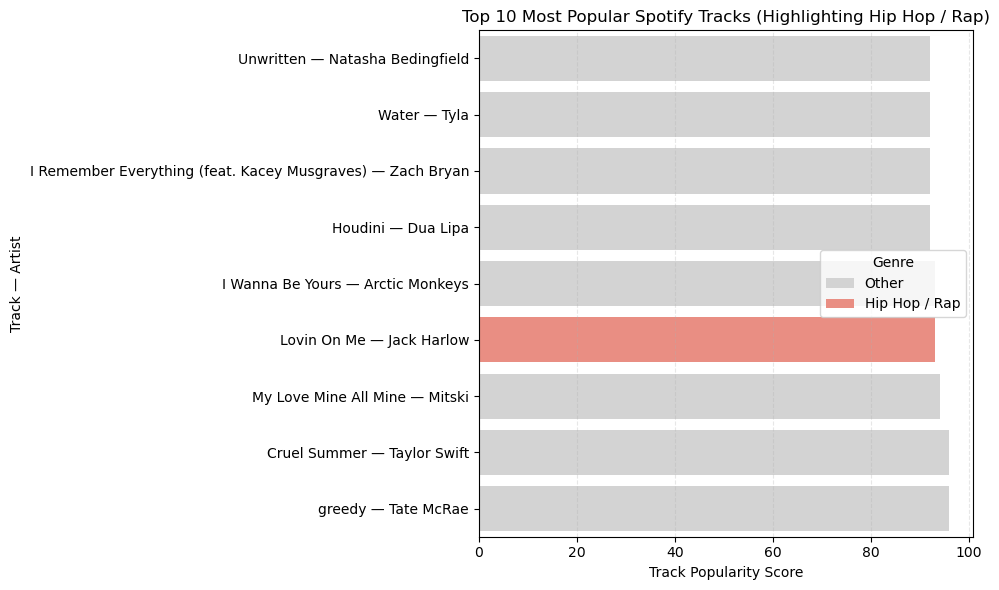

In [29]:
top_10_tracks = df.sort_values(by='track_popularity', ascending=False).head(10)

top_10_tracks['is_hiphop'] = top_10_tracks['genre_category'] == 'Hip Hop / Rap'

#Create a label for the y-axis (track and artist name)
top_10_tracks['track_label'] = top_10_tracks['track_name'] + " — " + top_10_tracks['artist_name']

#Assign color categories for hue
top_10_tracks['highlight'] = top_10_tracks['is_hiphop'].map({True: 'Hip Hop / Rap', False: 'Other'})

#Plot
plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_10_tracks.sort_values(by='track_popularity'),
    x='track_popularity',
    y='track_label',
    hue='highlight',
    palette={'Hip Hop / Rap': 'salmon', 'Other': 'lightgray'},
    dodge=False
)

plt.title("Top 10 Most Popular Spotify Tracks (Highlighting Hip Hop / Rap)")
plt.xlabel("Track Popularity Score")
plt.ylabel("Track — Artist")
plt.legend(title="Genre")
plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

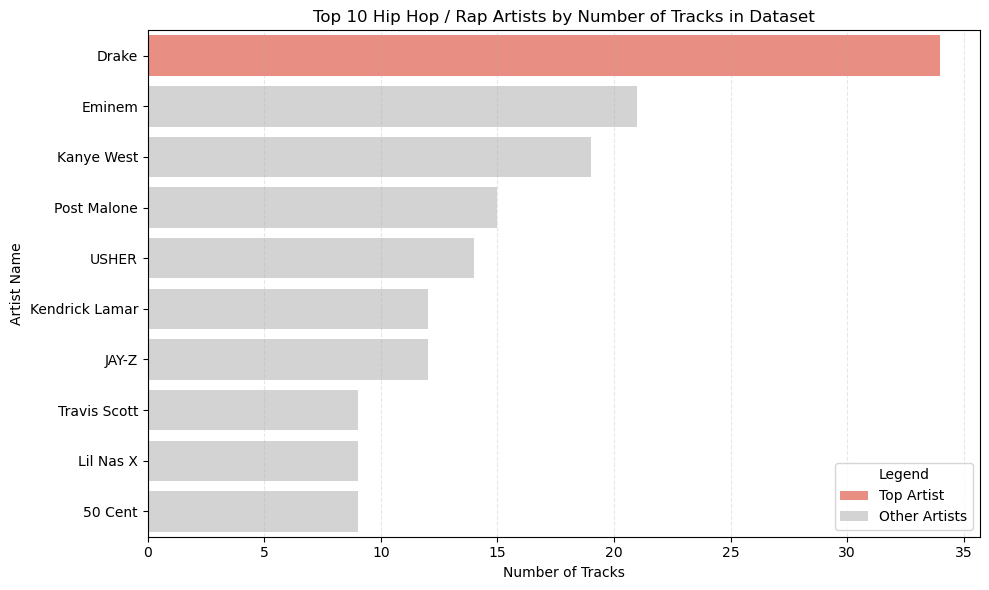

In [31]:
hiphop_df = df[df['genre_category'] == 'Hip Hop / Rap']

# Count tracks per artist
artist_counts = hiphop_df['artist_name'].value_counts().reset_index()
artist_counts.columns = ['artist_name', 'track_count']

top_artists = artist_counts.head(10).copy()  # prevents the warning

top_artists['highlight'] = top_artists['artist_name'].apply(
    lambda x: 'Top Artist' if x == top_artists.iloc[0]['artist_name'] else 'Other Artists'
)

# Plot with conditional color
plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_artists,
    x='track_count',
    y='artist_name',
    hue='highlight',
    palette={'Top Artist': 'salmon', 'Other Artists': 'lightgray'},
    dodge=False,
    legend=True
)

plt.title("Top 10 Hip Hop / Rap Artists by Number of Tracks in Dataset")
plt.xlabel("Number of Tracks")
plt.ylabel("Artist Name")
plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.legend(title="Legend")
plt.tight_layout()
plt.show()

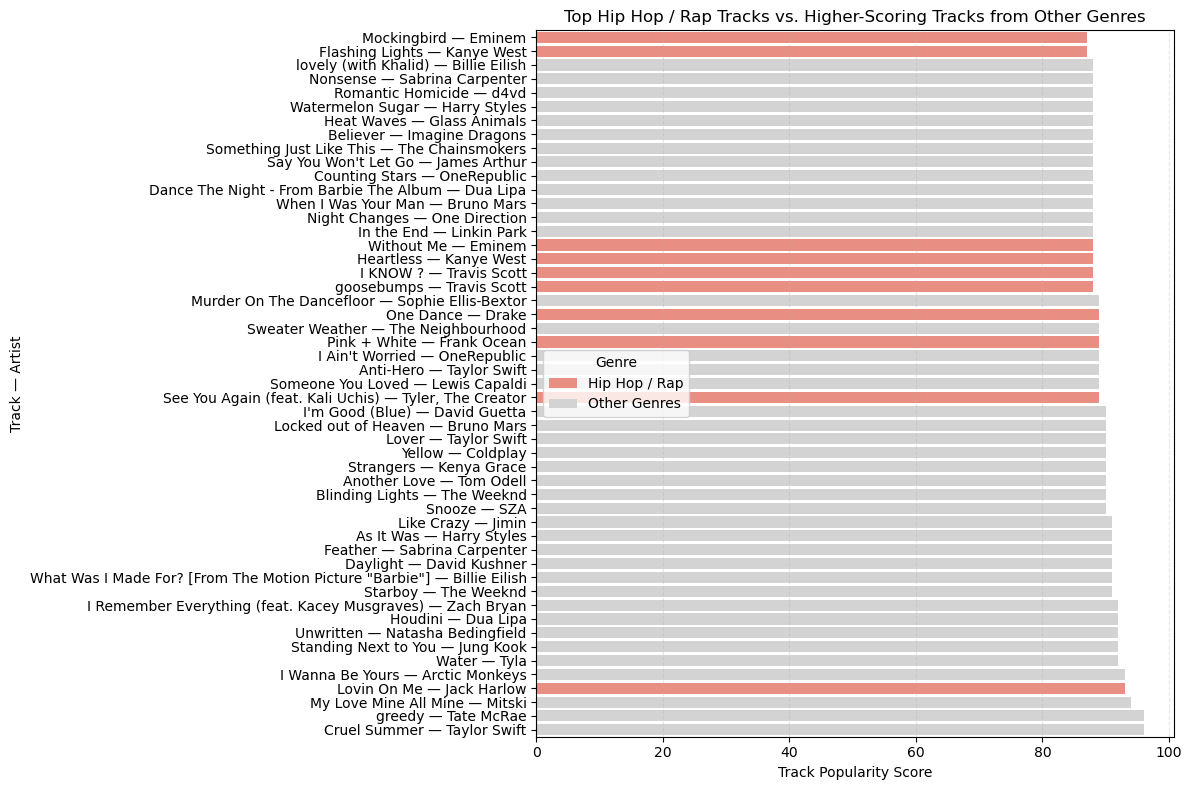

In [32]:
hiphop_top10 = df[df['genre_category'] == 'Hip Hop / Rap'].sort_values(by='track_popularity', ascending=False).head(10)

# Step 2: Get other genre tracks with higher popularity than the least popular top Hip Hop track
min_hiphop_score = hiphop_top10['track_popularity'].min()
other_top = df[(df['genre_category'] != 'Hip Hop / Rap') & (df['track_popularity'] > min_hiphop_score)]

# Step 3: Combine both sets
comparison_df = pd.concat([hiphop_top10, other_top])

# Step 4: Create label for plotting (Track — Artist)
comparison_df['track_label'] = comparison_df['track_name'] + " — " + comparison_df['artist_name']

# Step 5: Add highlight column for genre coloring
comparison_df['highlight'] = comparison_df['genre_category'].apply(
    lambda x: 'Hip Hop / Rap' if x == 'Hip Hop / Rap' else 'Other Genres'
)

# Step 6: Plot
plt.figure(figsize=(12, 8))
sns.barplot(
    data=comparison_df.sort_values(by='track_popularity'),
    x='track_popularity',
    y='track_label',
    hue='highlight',
    palette={'Hip Hop / Rap': 'salmon', 'Other Genres': 'lightgray'},
    dodge=False
)

plt.title("Top Hip Hop / Rap Tracks vs. Higher-Scoring Tracks from Other Genres")
plt.xlabel("Track Popularity Score")
plt.ylabel("Track — Artist")
plt.legend(title="Genre")
plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

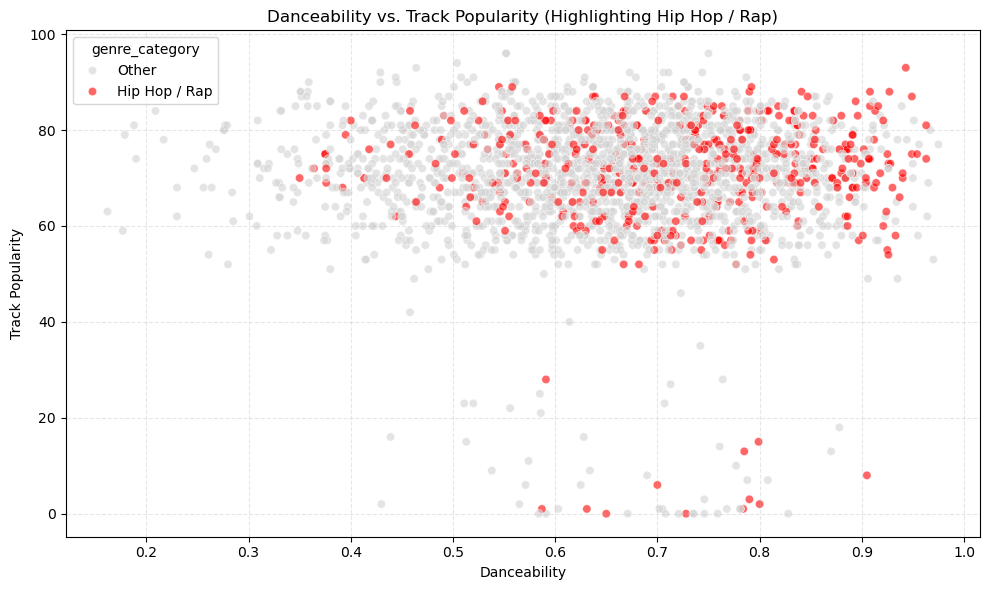

In [50]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='danceability',
    y='track_popularity',
    hue=df['genre_category'].apply(lambda x: 'Hip Hop / Rap' if x == 'Hip Hop / Rap' else 'Other'),
    palette={'Hip Hop / Rap': 'red', 'Other': 'lightgray'},
    alpha=0.6
)
plt.title("Danceability vs. Track Popularity (Highlighting Hip Hop / Rap)")
plt.xlabel("Danceability")
plt.ylabel("Track Popularity")
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


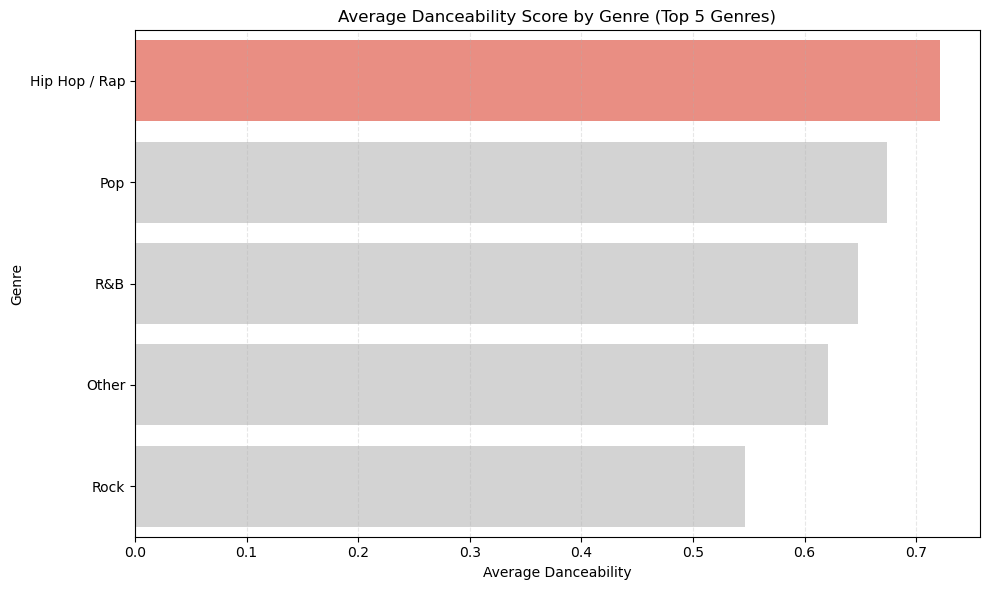

In [44]:
top_genres = df['genre_category'].value_counts().head(5).index.tolist()

# Step 2: Filter dataset for top 5 genres
filtered_df = df[df['genre_category'].isin(top_genres)]

# Step 3: Calculate average danceability
avg_danceability = filtered_df.groupby('genre_category')['danceability'].mean().reset_index()

# Step 4: Sort for display
avg_danceability = avg_danceability.sort_values(by='danceability', ascending=False)

# Step 5: Create highlight/hue column
avg_danceability['hue'] = avg_danceability['genre_category'].apply(
    lambda x: 'Hip Hop / Rap' if x == 'Hip Hop / Rap' else 'Other Genres'
)

# Step 6: Plot
plt.figure(figsize=(10, 6))
sns.barplot(
    data=avg_danceability,
    x='danceability',
    y='genre_category',
    hue='hue',
    palette={'Hip Hop / Rap': 'salmon', 'Other Genres': 'lightgray'},
    dodge=False,
    legend=False
)

plt.title("Average Danceability Score by Genre (Top 5 Genres)")
plt.xlabel("Average Danceability")
plt.ylabel("Genre")
plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


# Conclusion


The EDA conducted in this phase revealed that Hip Hop / Rap consistently outperform genres in key engagement meetrics sucj as trach popularity, danceability, and loudness. Through the combonation of distribution plots, genre comparisons, and artist-level breakdowns, it became clear that Hip Hop / Rap tracks tend to cluster in the high popularity range and exhibits characteristic that are strongly aligned withe user engagement on Spotify.


These findings support the argument that Spotify should continue refining it's personalizationstrategies and marketing efforts specifically tailored to Hip Hop / Rap listeners-an audience segment with oth high loyalty and engagement potential.  